In [1]:
import pandas as pd
import numpy as np
import re
import time
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("startup_funding.csv")

## Посмотрим сперва на данные

In [3]:
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
SNo                 2372 non-null int64
Date                2372 non-null object
StartupName         2372 non-null object
IndustryVertical    2201 non-null object
SubVertical         1436 non-null object
CityLocation        2193 non-null object
InvestorsName       2364 non-null object
InvestmentType      2371 non-null object
AmountInUSD         1525 non-null object
Remarks             419 non-null object
dtypes: int64(1), object(9)
memory usage: 102.0+ KB


### Видно что все признаки - объекты, и некоторые из них возможно привести к более выгодным типам, так же видно что SNo - индексный столбец

In [5]:
data = data.set_index('SNo')
data = data.drop(['Remarks'], axis=1)

In [6]:
data['AmountInUSD'] = data['AmountInUSD'].apply(lambda x: float(str(x).replace(",", "")))
data['AmountInUSD'] = pd.to_numeric(data['AmountInUSD'])

In [7]:
data[data['Date'] == '12/05.2015']

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
SNo,,,,,,,,
2103,12/05.2015,Mobiefit,Mobile Fitness App,NaN,Goa,Prototyze,Seed Funding,NaN
2104,12/05.2015,Plancess,Online Education Platform,NaN,Mumbai,"Rajendra Gogri, Chandrakant Gogri",Seed Funding,2000000.0


### В дате есть опечатки, их необходимо исправить

In [8]:
data['Date'] = data['Date'].str.replace('//', '/').str.replace('.', '/')
data['Date'] = pd.to_datetime(data['Date'],format='%d/%m/%Y')

## Посмотрим на распределение финансирования стартапов по месяцам

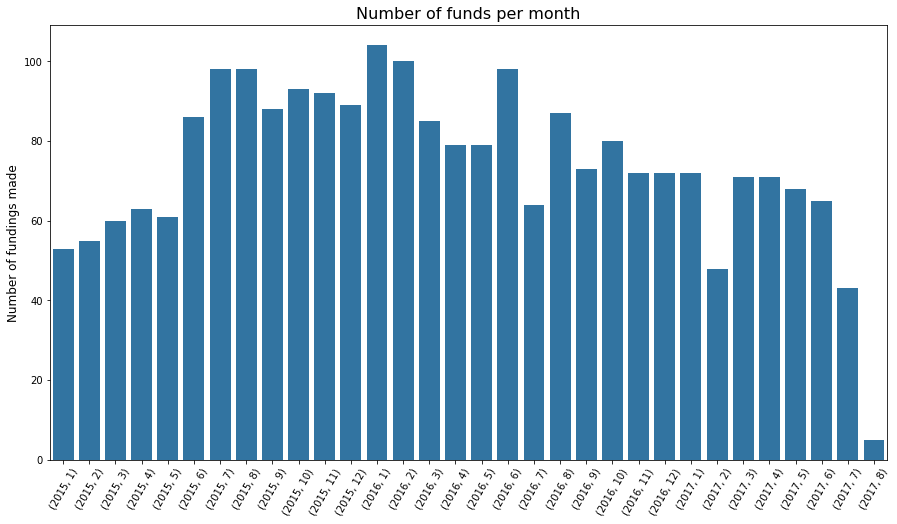

In [9]:
tmp = data.groupby(by=[data.Date.dt.year, data.Date.dt.month])['StartupName'].count()

color = sns.color_palette()
plt.figure(figsize=(15,8))
sns.barplot(tmp.index, tmp.values, color=color[0])
plt.xticks(rotation=60)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Number of funds per month", fontsize=16)
plt.show()

### Видно что пики приходятся на Январь-Февраль 2016 года, так же на Август-Сентябрь 2015 года. Спады же в начале 2015 года и в феврале 2017. Спад в августе 2017 гда обусловлен тем, что это последний месяц сбора данных и не все взносы могут быть отражены в данных

# Посмотрим в какие области больше всего вкладывают деньги

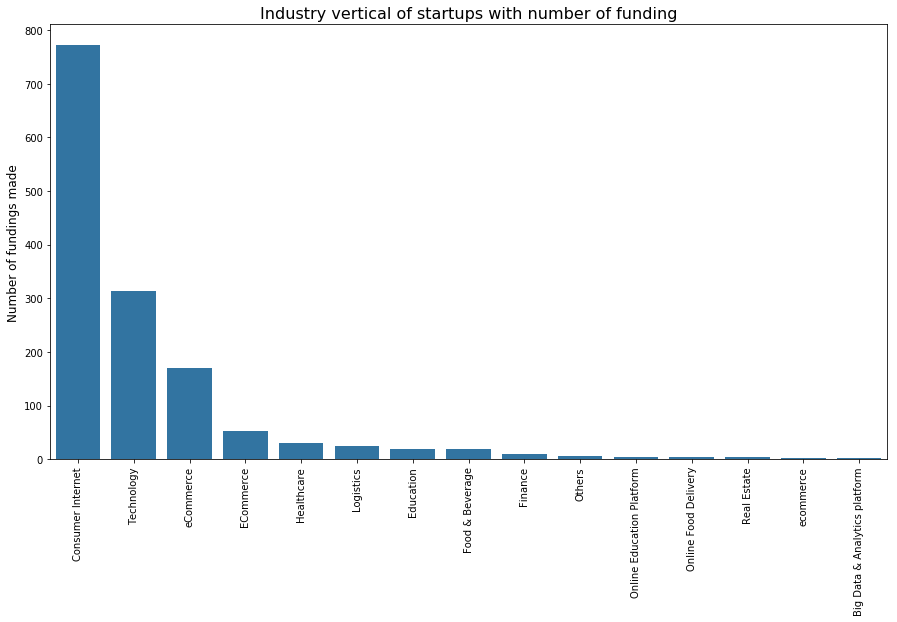

In [10]:
industry = data['IndustryVertical'].value_counts().head(15)
plt.figure(figsize=(15,8))
sns.barplot(industry.index, industry.values, color=color[0])
plt.xticks(rotation=90)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()

#Consumer internet and Technology are most popular

## Заметна тенденция вкладываться в стартапы связанные с Интернетом и технологиями в целом, а так же с Электронной коммерцией 

### Есть подозрение что eCommerce и ECommerce это одно и то же, а не разные категории

In [11]:
ECommerce = data[data['IndustryVertical'] == 'ECommerce']
eCommerce = data[data['IndustryVertical'] == 'eCommerce']
pd.merge(ECommerce,eCommerce, on='SubVertical')

,Date_x,StartupName_x,IndustryVertical_x,SubVertical,CityLocation_x,InvestorsName_x,InvestmentType_x,AmountInUSD_x,Date_y,StartupName_y,IndustryVertical_y,CityLocation_y,InvestorsName_y,InvestmentType_y,AmountInUSD_y
0,2017-05-18,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,2016-08-30,Paytm,eCommerce,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07
1,2017-03-03,Paytm Marketplace,ECommerce,ECommerce Marketplace,Bangalore,Alibaba,Private Equity,2.000000e+08,2017-03-21,Flipkart,eCommerce,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09
2,2016-01-12,Shopclues,ECommerce,ECommerce Marketplace,Gurgaon,"GIC, Tiger Global Management, Nexus Venture Pa...",Private Equity,1.000000e+08,2017-03-21,Flipkart,eCommerce,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09
3,2017-03-28,Fynd,ECommerce,Online fashion marketplace,Mumbai,Venture Catalysts,Private Equity,5.000000e+05,2017-04-26,StalkBuyLove,eCommerce,New Delhi,Trifecta Capital,Private Equity,1.000000e+06
4,2017-02-17,Urban Ladder,ECommerce,Online Furniture Store,Bangalore,"Kalaari Capital, SAIF Partners, Steadview Capi...",Private Equity,1.520000e+07,2016-08-24,UrbanLadder,eCommerce,Mumbai,Trifecta Capital,Private Equity,3.000000e+06
5,2016-03-14,PinkBlue,ECommerce,Medical Supplies eTailer,Bangalore,"Hari Krishna, Ajay Modani, Dr V Ravinder, Anir...",Seed Funding,2.236080e+05,2016-05-04,MyDentistChoice,eCommerce,Hyderabad,Undisclosed investors,Seed Funding,1.500000e+05


У этих категорий есть одинаковые подкатегории, то есть они пересекаются, можно предположить что это одна и та же категория, в которой были сделаны опечатки несколько раз или разные люди собирали данные и каждый называл по-своему.
Приведем названия к единому виду

In [12]:
data.replace({'eCommerce' : 'ECommerce'}, inplace=True)
data.replace({'Ecommerce' : 'ECommerce'}, inplace=True)

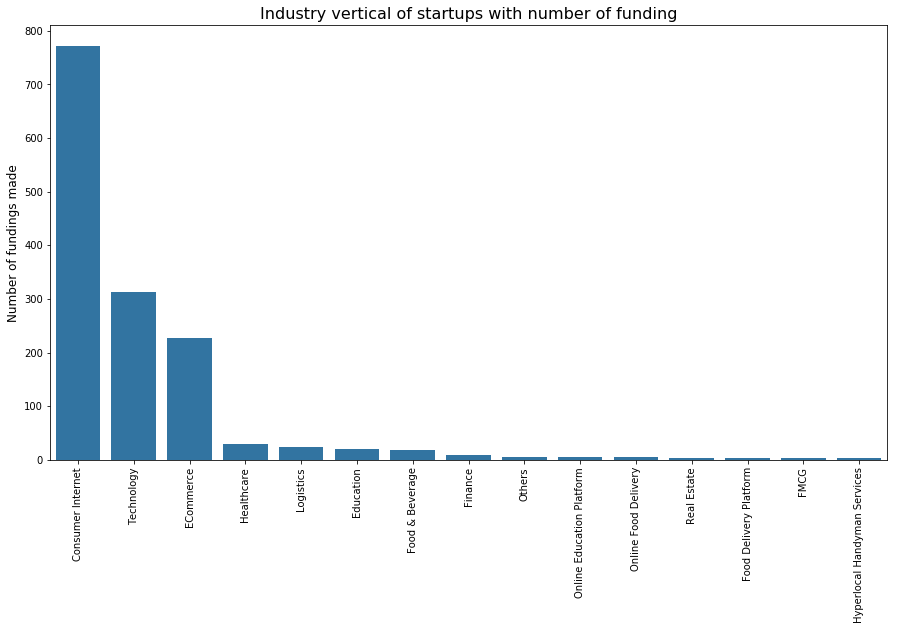

In [13]:
industry = data['IndustryVertical'].value_counts().head(15)
plt.figure(figsize=(15,8))
sns.barplot(industry.index, industry.values, color=color[0])
plt.xticks(rotation=90)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()

На тренды манипуляции не повлияли, но зато теперь картина более правдивая чем раньше

## Посмотрим теперь на популярность вложений по подкатегориям

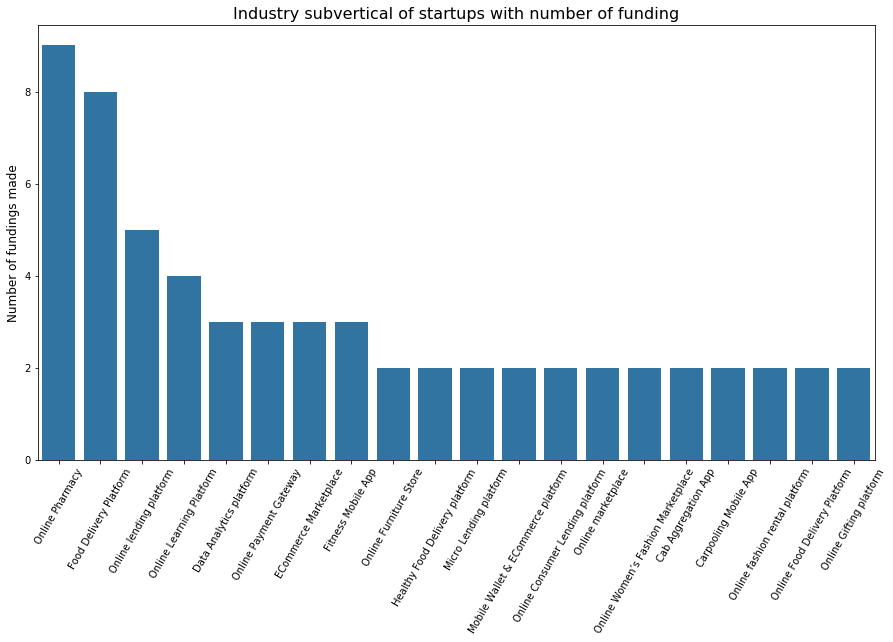

In [14]:
industry = data['SubVertical'].value_counts().head(20)
plt.figure(figsize=(15,8))
sns.barplot(industry.index, industry.values, color=color[0])
plt.xticks(rotation=60)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry subvertical of startups with number of funding", fontsize=16)
plt.show()

### Видно что самыми популярными являются Аптечные услуги онлайн и Платформы доставки еды. Затем идут Онлайн платформы займа и обучения. Заметен тренд популярности онлайн платформ

## Посмотрим на типы инвестиций

In [15]:
data.InvestmentType.value_counts()

Seed Funding      1271
Private Equity    1066
SeedFunding         30
PrivateEquity        1
Crowd funding        1
Debt Funding         1
Crowd Funding        1
Name: InvestmentType, dtype: int64

Заметно что есть опечатки. Исправим их

In [26]:
data['InvestmentType'] = data['InvestmentType'].str.replace('SeedFunding', 'Seed Funding'
                                              ).str.replace('PrivateEquity', 'Private Equity')

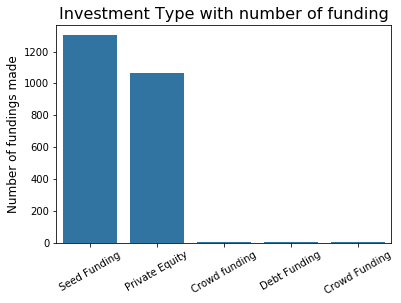

In [17]:
funds = data['InvestmentType'].value_counts()
sns.barplot(funds.index, funds.values, color=color[0])
plt.xticks(rotation=30)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investment Type with number of funding", fontsize=16)
plt.show()

### Самыми популярными являются Seed Funding и Private Equity

In [18]:
data.describe()

,AmountInUSD
count,1.525000e+03
mean,1.203107e+07
std,6.403118e+07
min,1.600000e+04
25%,3.700000e+05
50%,1.070000e+06
75%,6.000000e+06
max,1.400000e+09


### Максимальная инвестиция - 1400000000 USD, Минимальная - 16000 USD. Среднее -  12031073 USD

 ## Посмотрим на распределение суммы инвестирования
 (логарифмирование позволяет оставлять значимыми различия между небольшими значениями и делать менее значимыми различия между большими)

c:\program files (x86)\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


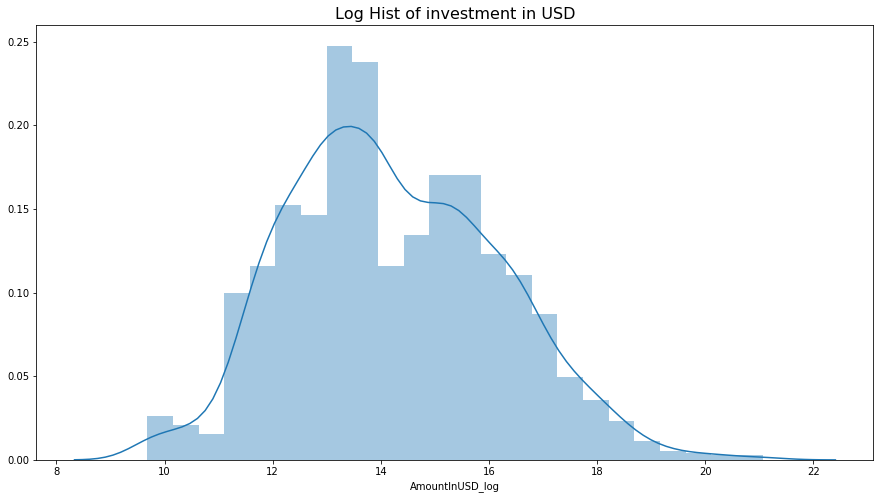

In [19]:
data['AmountInUSD_log'] = np.log(data["AmountInUSD"])

plt.figure(figsize=(15,8))
sns.distplot(data['AmountInUSD_log'].dropna())
plt.title("Log Hist of investment in USD", fontsize=16)
plt.show()

### Заметно что распределение похоже на нормальное (распределение Гаусса)

## Посмотрим на стартапы которые получили максимальные и минимальные суммы инвестирования

In [20]:
data[data['AmountInUSD'] == 1.400000e+09]

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,AmountInUSD_log
SNo,,,,,,,,,
158,2017-05-18,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,21.059738
294,2017-03-21,Flipkart,ECommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,21.059738


In [21]:
data[data['AmountInUSD'] == 1.600000e+04]

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,AmountInUSD_log
SNo,,,,,,,,,
2345,2015-01-19,Hostel Dunia,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,9.680344
2346,2015-01-19,Play your sport,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,9.680344
2347,2015-01-19,Yo Grad,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,9.680344
2348,2015-01-19,Enabli,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,9.680344
2349,2015-01-19,CBS,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,9.680344


Посмотрим побольше на Hyderabad Angels (at Startup Heroes event)

In [22]:
data[data['InvestorsName'] == 'Hyderabad Angels (at Startup Heroes event)']

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,AmountInUSD_log
SNo,,,,,,,,,
2345,2015-01-19,Hostel Dunia,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,9.680344
2346,2015-01-19,Play your sport,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,9.680344
2347,2015-01-19,Yo Grad,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,9.680344
2348,2015-01-19,Enabli,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,9.680344
2349,2015-01-19,CBS,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,9.680344


### Видно что Hyderabad Angels (at Startup Heroes event) инвестировали минимальные суммы во время эвента стартапов, но зато сразу в 5 стартапов

## Посмотрим сколько всего денег инвестировали в стартапы и посмотрим на самые инвестируемые из них

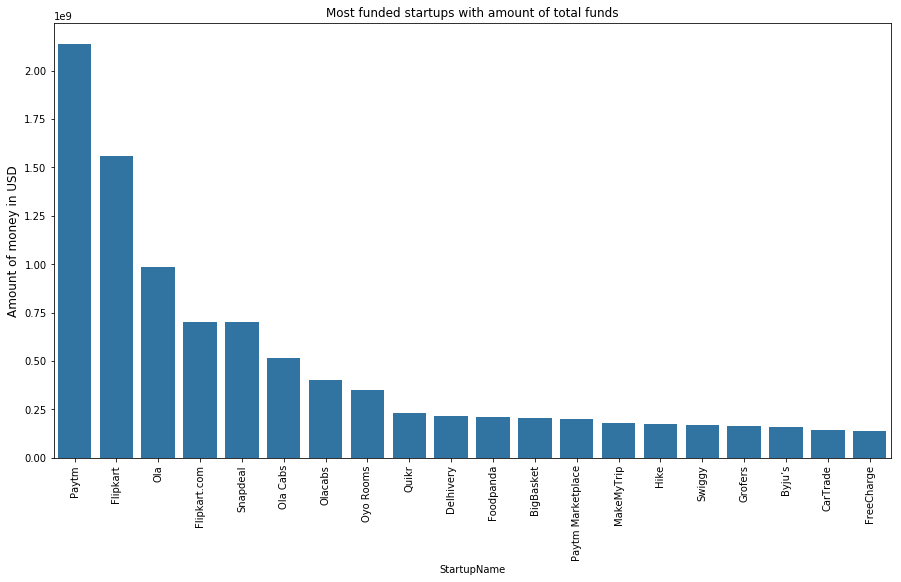

In [23]:
plt.figure(figsize=(15,8))
startup_funds = data.groupby(['StartupName'])['AmountInUSD'].agg(np.sum).sort_values(ascending = False).head(20)
sns.barplot(startup_funds.index, startup_funds.values, color=color[0])
plt.xticks(rotation='vertical')
plt.ylabel('Amount of money in USD', fontsize=12)
plt.title('Most funded startups with amount of total funds', fontsize=12)
plt.show()

### Посмотрим поближе на топ3

In [30]:
Paytm = data[data['StartupName'] == 'Paytm']
Flipkart = data[data['StartupName'] == 'Flipkart']
Ola = data[data['StartupName'] == 'Ola']

temp = [Paytm, Flipkart, Ola]
pd.concat(temp)

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,AmountInUSD_log,InvestorsName_lower
SNo,,,,,,,,,,
158,2017-05-18,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,21.059738,softbank group
821,2016-08-30,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07,17.909855,mediatek inc.
1787,2015-09-29,Paytm,E-Commerce & M-Commerce platform,NaN,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08,20.337603,"alibaba group, ant financial"
2218,2015-03-13,Paytm,NaN,NaN,NaN,Ratan Tata,Private Equity,NaN,NaN,ratan tata
2276,2015-02-05,Paytm,NaN,NaN,NaN,Ant Financial Services (Alipay),Private Equity,NaN,NaN,ant financial services (alipay)
101,2017-06-26,Flipkart,ECommerce,Online marketplace,Bangalore,Naspers,Private Equity,7.100000e+07,18.078190,naspers
294,2017-03-21,Flipkart,ECommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,21.059738,"microsoft, ebay, tencent holdings"
360,2017-02-20,Flipkart,ECommerce,Online Marketplace,Bangalore,"Bennett, Coleman and Co. Ltd (BCCL)",Private Equity,3.870000e+07,17.471350,"bennett, coleman and co. ltd (bccl)"
2017,2015-06-04,Flipkart,eCommerce platform,NaN,Bangalore,Morgan Stanley,Private Equity,5.000000e+07,17.727534,morgan stanley


По категориям по подкатегориям можно предположить, что Paytm и Flipkart похожие стартапы. Видно что у каждого из них свои крупные инвесторы. Возможно в Paytm вложили больше денег чем мы можем увидеть в данных, потому что некоторые значения отсуствуют.

Ola - по категории видно, что это Car Aggregator & Retail Mobile App, в который вложились несколько крупных компаний

## Посмотрим на инвестором поближе и на количество их инвестиций
(заранее заметив что в некоторых есть опечатки)

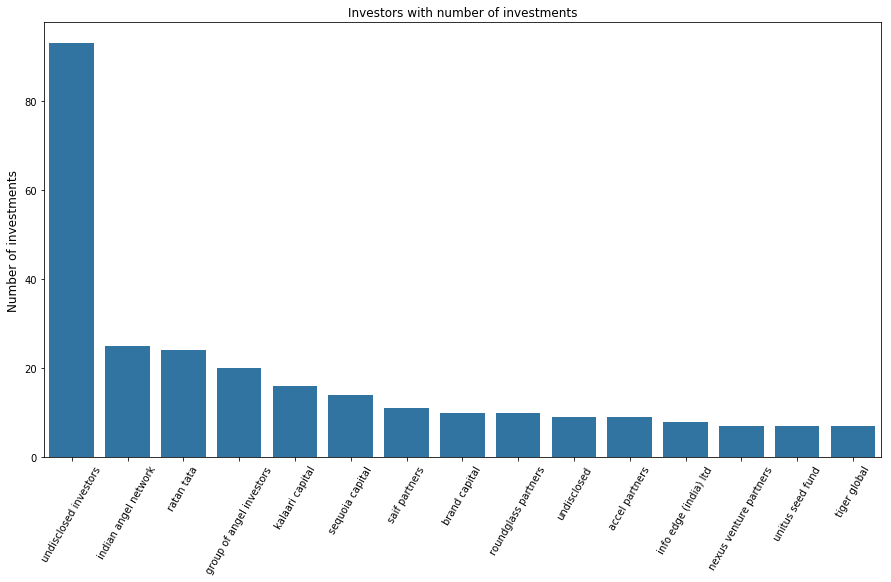

In [25]:
data['InvestorsName_lower'] = data.InvestorsName.str.lower()
investors = data['InvestorsName_lower'].replace('undisclosed investor', 'undisclosed investors')
investors = investors.value_counts().head(15)

plt.figure(figsize=(15,8))
sns.barplot(investors.index, investors.values, color=color[0])
plt.xticks(rotation=60)
plt.ylabel('Number of investments', fontsize=12)
plt.title('Investors with number of investments')
plt.show()

### Заметна тенденция среди инвесторов - скрывать свое имя. Возможно это сделано с целью не рекламировать лишний раз стартап, в который поверила известная фирма